## Importing Libraries

In [37]:
# Importing libs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [38]:
# from IPython.display import display, HTML

# display(HTML("""
# <style>
# /* Import JetBrains Mono */
# @import url('https://fonts.googleapis.com/css2?family=JetBrains+Mono:wght@400;500;600&display=swap');

# /* Global notebook styling - added more specific selectors */
# body, .jp-Notebook, .jp-NotebookPanel, .container, #notebook-container {
#     font-family: 'JetBrains Mono', monospace !important;
#     font-size: 17px;
#     background-color: #0f1117 !important;
#     color: #e6e6e6 !important;
# }

# /* Code cells and outputs */
# code, pre, .jp-CodeMirror, .CodeMirror pre {
#     font-family: 'JetBrains Mono', monospace !important;
#     font-size: 16px !important;
# }

# /* Tables - Increased specificity to override default pandas/jupyter styles */
# .rendered_html table, table.dataframe {
#     border-collapse: collapse !important;
#     margin: 1em 0 !important;
#     font-size: 16px !important;
#     background-color: #161a23 !important;
#     border-radius: 10px !important;
#     overflow: hidden !important;
#     box-shadow: 0 8px 24px rgba(0,0,0,0.4) !important;
#     border: none !important;
# }

# /* Table header */
# .rendered_html thead th, .dataframe thead th {
#     background-color: #1f2430 !important;
#     color: #cdd6f4 !important;
#     padding: 12px 14px !important;
#     text-align: left !important;
#     font-weight: 600 !important;
#     border-bottom: 1px solid #2a2f3a !important;
# }

# /* Table body cells */
# .rendered_html tbody td, .dataframe tbody td {
#     padding: 10px 14px !important;
#     border-bottom: 1px solid #2a2f3a !important;
#     color: #e6e6e6 !important;
# }

# /* Zebra striping */
# .rendered_html tbody tr:nth-child(even) {
#     background-color: #141824 !important;
# }

# /* Row hover effect */
# .rendered_html tbody tr:hover {
#     background-color: #22273a !important;
# }

# /* Scrollbar styling */
# ::-webkit-scrollbar { width: 10px; height: 10px; }
# ::-webkit-scrollbar-track { background: #0f1117; }
# ::-webkit-scrollbar-thumb { background: #2a2f3a; border-radius: 6px; }
# </style>
# """))

In [39]:
# Setting global font
plt.rcParams['font.family'] = 'serif'

## Data Loading

In [40]:
# Loading data
df = pd.read_csv("../data/raw/drug_data.csv")
df.head(3)

,drug_name,medical_condition,medical_condition_description,activity,rx_otc,pregnancy_category,csa,alcohol,rating,no_of_reviews,medical_condition_url,drug_link
0,doxycycline,Acne,Acne Other names: Acne Vulgaris; Blackheads; B...,87%,Rx,D,N,X,6.8,760.0,https://www.drugs.com/condition/acne.html,https://www.drugs.com/doxycycline.html
1,spironolactone,Acne,Acne Other names: Acne Vulgaris; Blackheads; B...,82%,Rx,C,N,X,7.2,449.0,https://www.drugs.com/condition/acne.html,https://www.drugs.com/spironolactone.html
2,minocycline,Acne,Acne Other names: Acne Vulgaris; Blackheads; B...,48%,Rx,D,N,NaN,5.7,482.0,https://www.drugs.com/condition/acne.html,https://www.drugs.com/minocycline.html


## General Considerations

In [41]:
# Code is Coming

Major Column Descriptors

activity:
Indicates recent site visitor activity relative to other medications in the list. Data was gathered from Drugs.com
.

rx_otc:
Represents whether a drug requires a prescription (Rx) or is available over-the-counter (OTC).

OTC: Can be purchased without a prescription.

Rx: Prescription needed.

Rx/OTC: Available either by prescription or over-the-counter.

pregnancy_category:
Classifies drugs based on safety during pregnancy:

A: Well-controlled studies show no fetal risk in the first trimester and no evidence of risk later.

B: Animal studies show no fetal risk; no adequate human studies.

C: Animal studies show fetal risk; no adequate human studies, but potential benefits may justify use.

D: Positive evidence of fetal risk in humans; potential benefits may justify use despite risks.

X: Evidence of fetal abnormalities or risk clearly outweighs potential benefits.

N: Not classified by the FDA.

csa:
Controlled Substances Act (CSA) Schedule:

M: Multiple schedules depending on dosage or form.

U: CSA schedule unknown.

N: Not subject to the CSA.

1–5: Range of abuse potential, from high (1) to low (5), with associated medical use and dependence risk.

alcohol:
Indicates interaction with alcohol: X = interacts with alcohol.

rating:
User rating of medication effectiveness considering positive/adverse effects and ease of use. Scale: 1 = not effective, 10 = most effective.

I focused on pain and cold medications for a deeper analysis because they are among the most commonly used drugs.

## Handling Missing Data

In [42]:
# Missing data
df.isna().sum()/len(df)*100

drug_name                         0.000000
medical_condition                 0.000000
medical_condition_description     0.000000
activity                          0.000000
rx_otc                            0.025259
pregnancy_category                6.289467
csa                               0.000000
alcohol                          49.709523
rating                           46.526901
no_of_reviews                    46.526901
medical_condition_url             0.000000
drug_link                         0.000000
dtype: float64

Since alcohol, rating, and number of reviews have a high percentage of missing values, they will be excluded from the analysis. For pregnancy_category, missing values will be imputed using the mode.

In [43]:
df.groupby('pregnancy_category').size()

pregnancy_category
A      19
B     719
C    1889
D     339
N     600
X     144
dtype: int64

Here, we observe that category C is the most common, so we will replace all missing values with C.

For the Rx/OTC category, some drugs may be available OTC in small doses but require a prescription in larger doses. Therefore, all Rx/OTC drugs will be considered as OTC.

In [44]:
# Replacments
df['pregnancy_category'] = df['pregnancy_category'].fillna('C')
df['rx_otc'] = df['rx_otc'].replace('Rx/OTC', 'OTC')
df['rx_otc'] = df['rx_otc'].fillna('Rx')

In [45]:
# Checking rx_otc column
df.groupby('rx_otc').size()

rx_otc
OTC    1257
Rx     2702
dtype: int64

In [46]:
# Drops
cols_to_drop = ['alcohol', 'rating', 'no_of_reviews']
cols_existing = [col for col in cols_to_drop if col in df.columns]
df.drop(columns=cols_existing, inplace=True)

In [47]:
# Checking Missings
df.isna().sum()/len(df)*100

drug_name                        0.0
medical_condition                0.0
medical_condition_description    0.0
activity                         0.0
rx_otc                           0.0
pregnancy_category               0.0
csa                              0.0
medical_condition_url            0.0
drug_link                        0.0
dtype: float64

In [48]:
# Path
output_path = Path("../data/processed/drug_data_processed.csv")

# Export
df.to_csv(output_path, index=False)

print("Processed data saved to:", output_path)


Processed data saved to: ..\data\processed\drug_data_processed.csv


No missing data remains; we can now proceed with visualization.

## Data Visualization

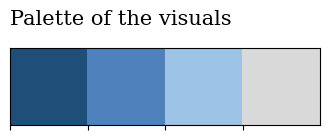

In [49]:
# Palette
colors = ['#1f4e79', '#4f81bd', '#9dc3e6', '#d9d9d9']

sns.palplot(colors)
plt.title("Palette of the visuals",loc='left',fontfamily='Serif',fontsize=15,y=1.2)
plt.show()

In [50]:
# Lets get insights from medical_condition column
common_drugs = df.groupby('medical_condition').size().sort_values(ascending=False)
top_common_drugs = common_drugs.head(10)
top_common_drugs

medical_condition
Pain                    393
Colds & Flu             246
Acne                    238
Hayfever                235
Hypertension            214
Psoriasis               200
Rheumatoid Arthritis    190
Osteoarthritis          172
Diabetes (Type 2)       161
Pneumonia               141
dtype: int64

The most common medical conditions treated with these drugs are listed

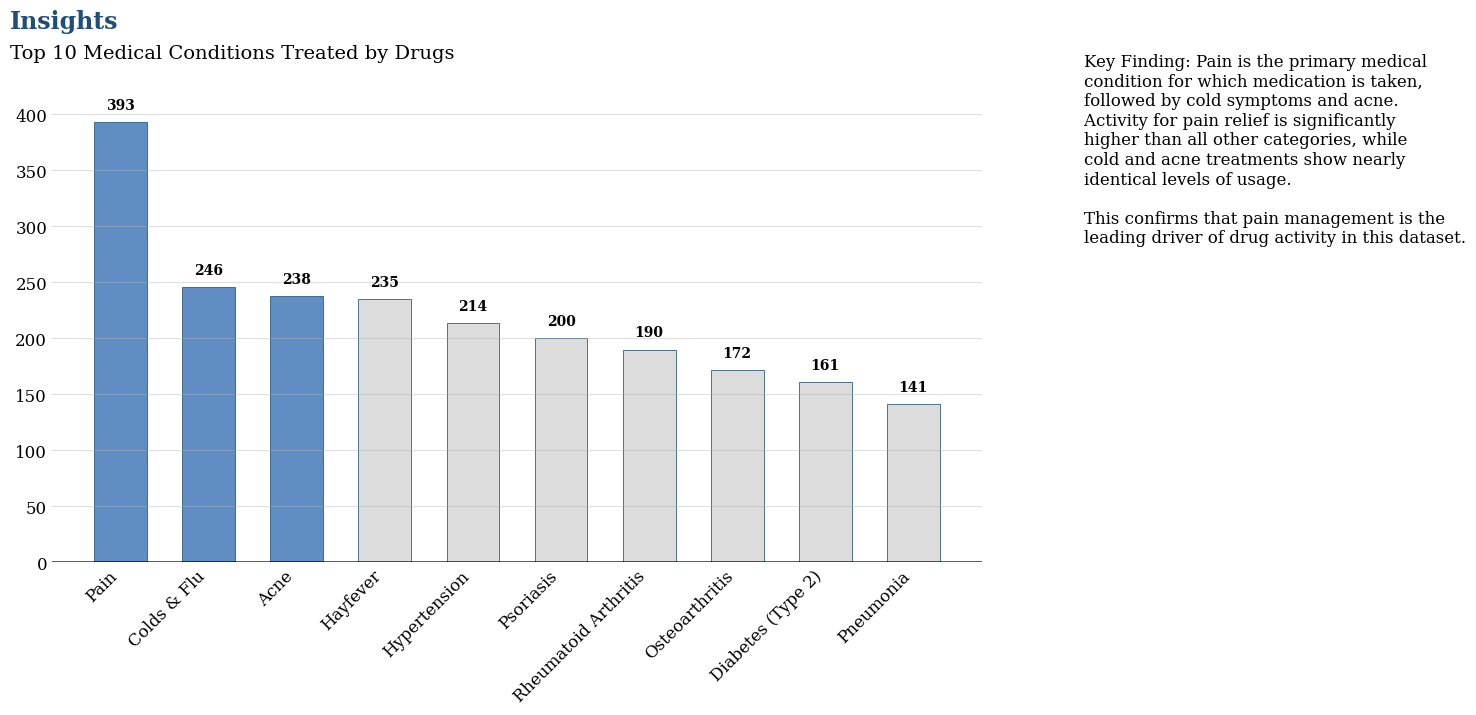

In [51]:
# Colors '#1f4e79', '#4f81bd', '#9dc3e6', '#d9d9d9'

color_map = ['#d9d9d9'] * len(top_common_drugs)
color_map[:3] = ['#4f81bd'] * 3

fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(
    top_common_drugs.index,
    top_common_drugs,
    color=color_map,
    alpha=0.9,
    width=0.6,
    linewidth=0.6,
    edgecolor='#1f4e79'
)

# Text
fig.text(0.09, 1, 
         'Insights', 
         fontfamily='Serif', 
         fontweight='bold', 
         fontsize=17, 
         color='#1f4e79'
        )
fig.text(0.09, 0.95, 
         'Top 10 Medical Conditions Treated by Drugs', 
         fontfamily='Serif', 
         fontweight='light', 
         fontsize=14
        )
fig.text(0.95, 0.61, '''
        Key Finding: Pain is the primary medical 
        condition for which medication is taken, 
        followed by cold symptoms and acne. 
        Activity for pain relief is significantly 
        higher than all other categories, while 
        cold and acne treatments show nearly 
        identical levels of usage. 
                
        This confirms that pain management is the 
        leading driver of drug activity in this dataset.
    '''
        ,fontsize=12, 
        fontweight='light', 
        fontfamily='serif'
    )

# X ticks
ax.tick_params(axis='x', labelrotation=45)
for label in ax.get_xticklabels():
    label.set_fontfamily('serif')
    label.set_ha('right')

# Annotations
for i in top_common_drugs.index:
    ax.annotate(f"{top_common_drugs[i]}",
                xy=(i, top_common_drugs[i]+15),
                 va = 'center', ha='center',
                 fontweight='bold', 
                 fontfamily='serif',
                 fontsize=10
                )

# Remove spines
for s in ['top', 'right', 'left', 'bottom']:
    ax.spines[s].set_visible(False)

# Remove axis tick dashes (the "-" you see)
ax.tick_params(axis=u'both', which=u'both',length=0)

# Baseline
ax.axhline(y=0, color='black', linewidth=1.3, alpha=0.7)

# Grid
ax.grid(axis='y', alpha=0.4)

ax.tick_params(axis='both', which='major', labelsize=12)


Since drugs used to treat pain (painkillers) are widely used, their activity, tolerance, and pregnancy safety should be examined.

In [52]:
pain_drugs = df[df['medical_condition'] == 'Pain']
pain_drugs.head(3)

,drug_name,medical_condition,medical_condition_description,activity,rx_otc,pregnancy_category,csa,medical_condition_url,drug_link
2745,tramadol,Pain,Pain An unpleasant sensory and emotional exper...,95%,Rx,C,4,https://www.drugs.com/condition/pain.html,https://www.drugs.com/tramadol.html
2746,gabapentin,Pain,Pain An unpleasant sensory and emotional exper...,77%,Rx,C,N,https://www.drugs.com/condition/pain.html,https://www.drugs.com/gabapentin.html
2747,ibuprofen,Pain,Pain An unpleasant sensory and emotional exper...,58%,OTC,C,N,https://www.drugs.com/condition/pain.html,https://www.drugs.com/ibuprofen.html


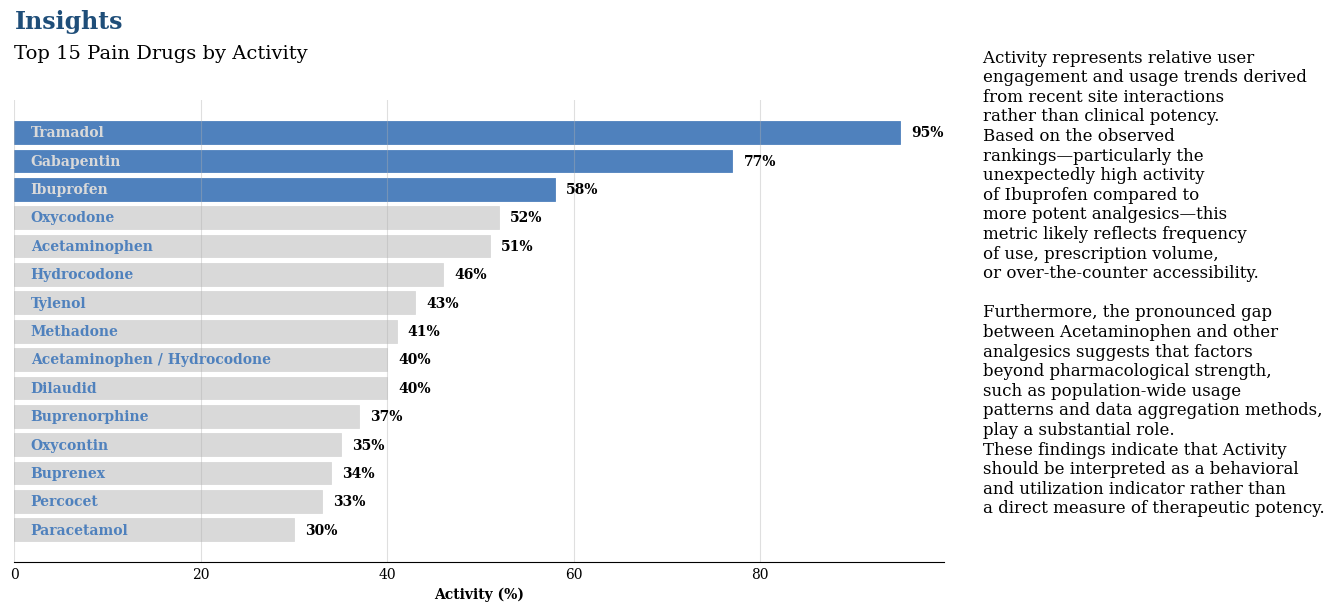

In [53]:
top_pain_drugs = pain_drugs.head(15).copy()
top_pain_drugs.loc[:, 'activity'] = pd.to_numeric(
    top_pain_drugs['activity'].astype(str).str.replace('%', ''), 
    errors='coerce'
)
top_pain_drugs = top_pain_drugs.sort_values(by='activity', ascending=False)
top_pain_drugs.loc[:, 'drug_name'] = top_pain_drugs['drug_name'].str.title()

color_map = ['#d9d9d9'] * len(top_pain_drugs)
color_map[:3] = ['#4f81bd'] * 3

text_color_map = ['#4f81bd'] * len(top_pain_drugs)
text_color_map[:3] = ['#d9d9d9'] * 3

fig, ax = plt.subplots(1,1, figsize=(12,6))

bars = ax.barh(top_pain_drugs['drug_name'],top_pain_drugs['activity'], linewidth=0.6, edgecolor='#1f4e79')
for i, bar in enumerate(bars):
    width = bar.get_width()
    label = top_pain_drugs['drug_name'].iloc[i]

    bar.set_color(color_map[i])
    
    ax.annotate(
        label,
        xy=(1, bar.get_y() + bar.get_height()/2), 
        xytext=(5, 0),                            
        textcoords="offset points",
        va='center', 
        ha='left',                                
        fontsize=10,
        color=text_color_map[i],                            
        fontweight='bold',
        fontfamily='serif'
    )

    activity_value = top_pain_drugs['activity'].iloc[i]

    ax.annotate(
        f'{activity_value}%',
        xy=(activity_value, bar.get_y() + bar.get_height()/2),
        xytext=(8, 0),                    
        textcoords="offset points",
        va='center', ha='left',                          
        fontsize=10,
        color='black',                    
        fontweight='bold',
        fontfamily='serif'
    )

fig.text(0.125, 1, 'Insights', fontfamily='Serif', fontweight='bold', fontsize=17, color='#1f4e79')
fig.text(0.125, 0.95, 'Top 15 Pain Drugs by Activity', fontfamily='Serif', fontweight='light', fontsize=14)
fig.text(0.915, 0.16, '''
    Activity represents relative user 
    engagement and usage trends derived
    from recent site interactions 
    rather than clinical potency. 
    Based on the observed 
    rankings—particularly the 
    unexpectedly high activity 
    of Ibuprofen compared to 
    more potent analgesics—this 
    metric likely reflects frequency 
    of use, prescription volume, 
    or over-the-counter accessibility.
         
    Furthermore, the pronounced gap 
    between Acetaminophen and other 
    analgesics suggests that factors 
    beyond pharmacological strength, 
    such as population-wide usage 
    patterns and data aggregation methods, 
    play a substantial role. 
    These findings indicate that Activity
    should be interpreted as a behavioral 
    and utilization indicator rather than 
    a direct measure of therapeutic potency.
    '''
    ,fontsize=12, fontweight='light', fontfamily='serif'
)

spines = ['top', 'left', 'right']
for i in spines:
    ax.spines[i].set_visible(False)

ax.set_yticklabels([])
ax.tick_params(axis=u'both', which=u'both',length=0)

ax.grid(axis='x', alpha=0.4)

ax.set_xlabel('Activity (%)',fontfamily='serif', fontweight='bold')
ax.set_title('')
ax.invert_yaxis() 

Let's examine the number of OTC and Rx drugs among pain medications and see what insights we can derive from them.

In [54]:
pain_drugs.loc[:, 'activity'] = pd.to_numeric(
    pain_drugs['activity'].astype(str).str.replace('%', ''), 
    errors='coerce'
)

pain_otc_rx = pain_drugs.groupby('rx_otc')['activity'].agg(['count', 'mean'])

pain_otc_rx.columns = ['Total Drugs', 'Average Activity (%)']

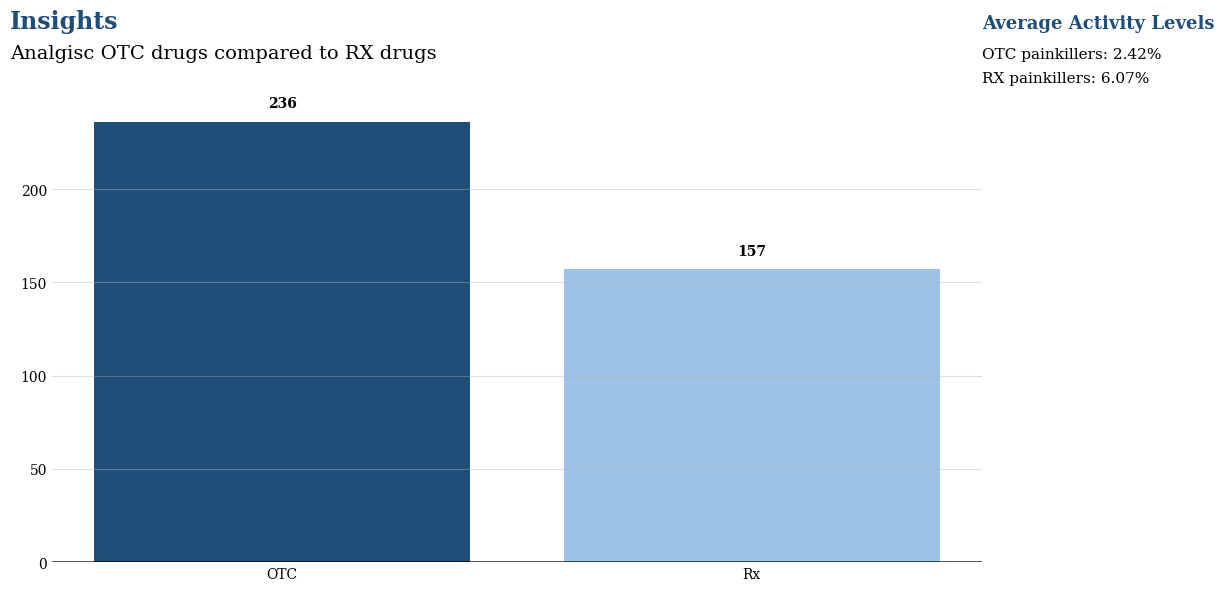

In [55]:
# Colors '#1f4e79', '#4f81bd', '#9dc3e6', '#d9d9d9'
fig, ax = plt.subplots(1,1, figsize=(12,6))
color_map = ['#1f4e79','#9dc3e6']

ax.bar(pain_otc_rx.index, pain_otc_rx['Total Drugs'], color=color_map)

fig.text(0.09,1,"Insights",color='#1f4e79', fontfamily='serif', fontweight='bold', fontsize=17)
fig.text(0.09,0.95,"Analgisc OTC drugs compared to RX drugs", fontfamily='serif', fontweight='light', fontsize=14)
fig.text(
    0.9, 1,
    "Average Activity Levels",
    fontsize=13,
    fontfamily='serif',
    fontweight="bold",
    color="#1f4e79"
)
fig.text(
    0.9, 0.95,
    f"OTC painkillers: {pain_otc_rx.iloc[0]['Average Activity (%)']:.2f}%",
    fontsize=11,
    fontfamily='serif'
)
fig.text(
    0.9, 0.91,
    f"RX painkillers: {pain_otc_rx.iloc[1]['Average Activity (%)']:.2f}%",
    fontsize=11,
    fontfamily='serif'
)

spines = ['top', 'bottom', 'left', 'right']
for s in spines:
    ax.spines[s].set_visible(False)

for i in pain_otc_rx.index:
    ax.annotate(
        f"{pain_otc_rx.loc[i, 'Total Drugs']}",
        xy=(i, pain_otc_rx.loc[i, 'Total Drugs'] + 10),
        ha='center',
        va='center',
        fontfamily='serif',
        fontweight='bold'
    )

for label in ax.get_yticklabels():
    label.set_fontname('serif')

for label in ax.get_xticklabels():
    label.set_fontname('serif')

ax.tick_params(axis=u'both', which=u'both',length=0)

ax.axhline(y=0, color='black', linewidth=1.3, alpha=0.7)

ax.grid(axis='y', alpha=0.4)


Let's examine the distribution of pregnancy categories among pain medications and see what insights we can derive from them.

In [56]:
pain_preg = pain_drugs.groupby('pregnancy_category')['pregnancy_category'].agg(['count'])
pain_preg.columns = ['Number of drugs']

Text(0.5, 1.0, 'Distribution of Pain Drugs by Pregnancy Category')

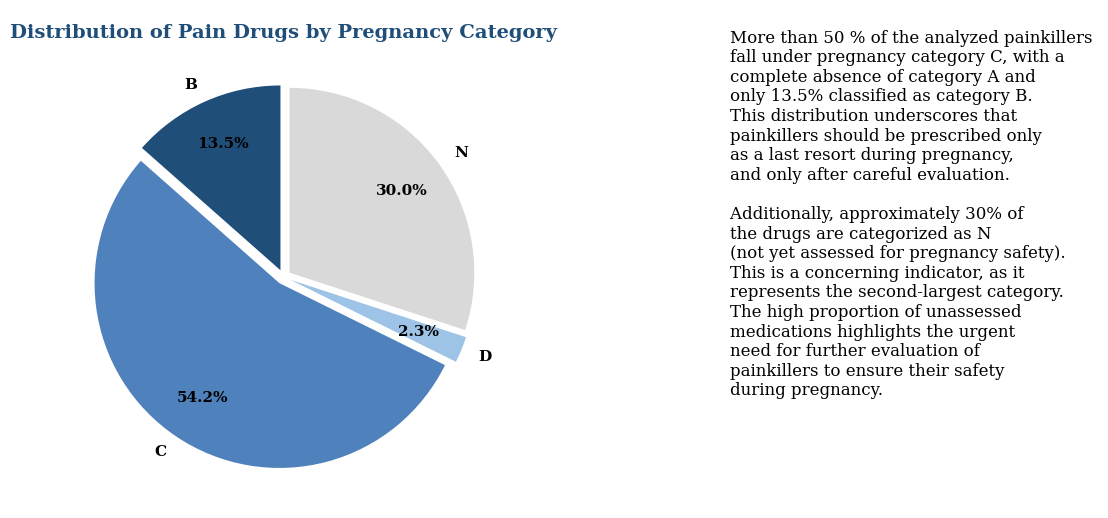

In [57]:
fig, ax = plt.subplots(1,1, figsize=(12,6))
color_map =['#1f4e79', '#4f81bd', '#9dc3e6', '#d9d9d9']

explode = [0.04] * len(pain_preg)

ax.pie(
    pain_preg['Number of drugs'],
    labels=pain_preg.index,
    autopct='%1.1f%%',
    startangle=90,
    explode=explode,
    colors=color_map,
    textprops={
        'fontfamily': 'serif',
        'fontweight': 'bold',
        'fontsize': 11
    },
    pctdistance=0.75
)

fig.text(0.85, 0.265, '''
        More than 50 % of the analyzed painkillers 
        fall under pregnancy category C, with a 
        complete absence of category A and 
        only 13.5% classified as category B. 
        This distribution underscores that 
        painkillers should be prescribed only 
        as a last resort during pregnancy, 
        and only after careful evaluation.

        Additionally, approximately 30% of 
        the drugs are categorized as N 
        (not yet assessed for pregnancy safety). 
        This is a concerning indicator, as it 
        represents the second-largest category. 
        The high proportion of unassessed 
        medications highlights the urgent 
        need for further evaluation of 
        painkillers to ensure their safety 
        during pregnancy.
        '''
        , fontsize=12, fontweight='light', fontfamily='serif'
    )

ax.set_title("Distribution of Pain Drugs by Pregnancy Category", fontfamily='serif', fontweight='bold', color='#1f4e79', fontsize=14)

Now, let's examine cold and flu medications and see what insights we can gain.

Next, we will examine the distribution of OTC and Rx drugs to understand their prevalence and any patterns in usage.

In [58]:
cold_drugs = df[df['medical_condition']=='Colds & Flu']
otc_rx_cold_drugs = cold_drugs.groupby('rx_otc')[['rx_otc']].count()
otc_rx_cold_drugs.columns = ['count']

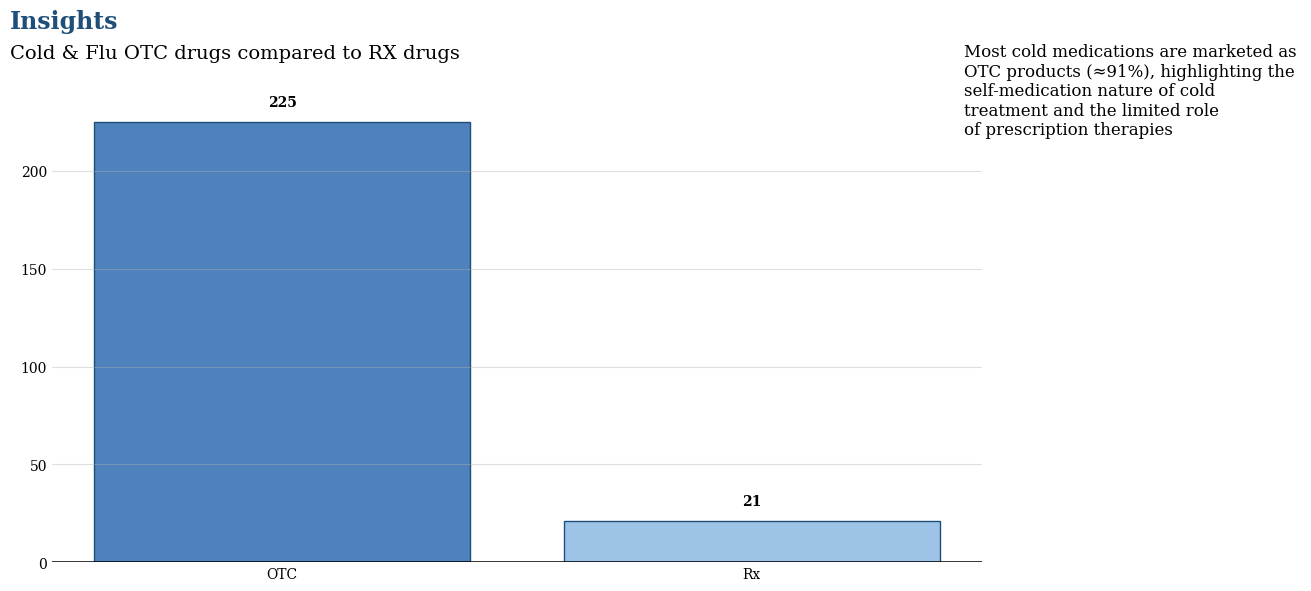

In [59]:
fig, ax = plt.subplots(1,1, figsize=(12,6))
color_map =['#1f4e79', '#4f81bd', '#9dc3e6', '#d9d9d9']

ax.bar(otc_rx_cold_drugs.index, otc_rx_cold_drugs['count'], edgecolor='#1f4e79', color=color_map[1:3])

spines = ['top', 'bottom', 'left', 'right']
for s in spines:
    ax.spines[s].set_visible(False)

ax.axhline(color='black', alpha=0.4, linewidth=1.3)

for i in otc_rx_cold_drugs.index:
    ax.annotate(
        f"{otc_rx_cold_drugs['count'][i]}",
        xy=(i, otc_rx_cold_drugs['count'][i] + 10),
        ha='center',
        va='center',
        fontfamily='serif',
        fontweight='bold'
    )
    
fig.text(0.85, 0.79, '''
        Most cold medications are marketed as 
        OTC products (≈91%), highlighting the 
        self-medication nature of cold 
        treatment and the limited role 
        of prescription therapies
        '''
        , fontsize=12, fontweight='light', fontfamily='serif'
    )
fig.text(0.09,1,"Insights",color='#1f4e79', fontfamily='serif', fontweight='bold', fontsize=17)
fig.text(0.09,0.95,"Cold & Flu OTC drugs compared to RX drugs", fontfamily='serif', fontweight='light', fontsize=14)

ax.tick_params(axis=u'both', which=u'both',length=0)

for label in ax.get_yticklabels():
    label.set_fontname('serif')

for label in ax.get_xticklabels():
    label.set_fontname('serif')

ax.axhline(y=0, color='black', linewidth=1.3, alpha=0.7)

ax.grid(axis='y', alpha=0.4)

Next, we will examine the distribution of pregnancy categories to understand their prevalence and any patterns in usage.

In [60]:
cold_preg_drugs = cold_drugs.groupby('pregnancy_category')['pregnancy_category'].agg(['count']).sort_values(by='count',ascending=False)

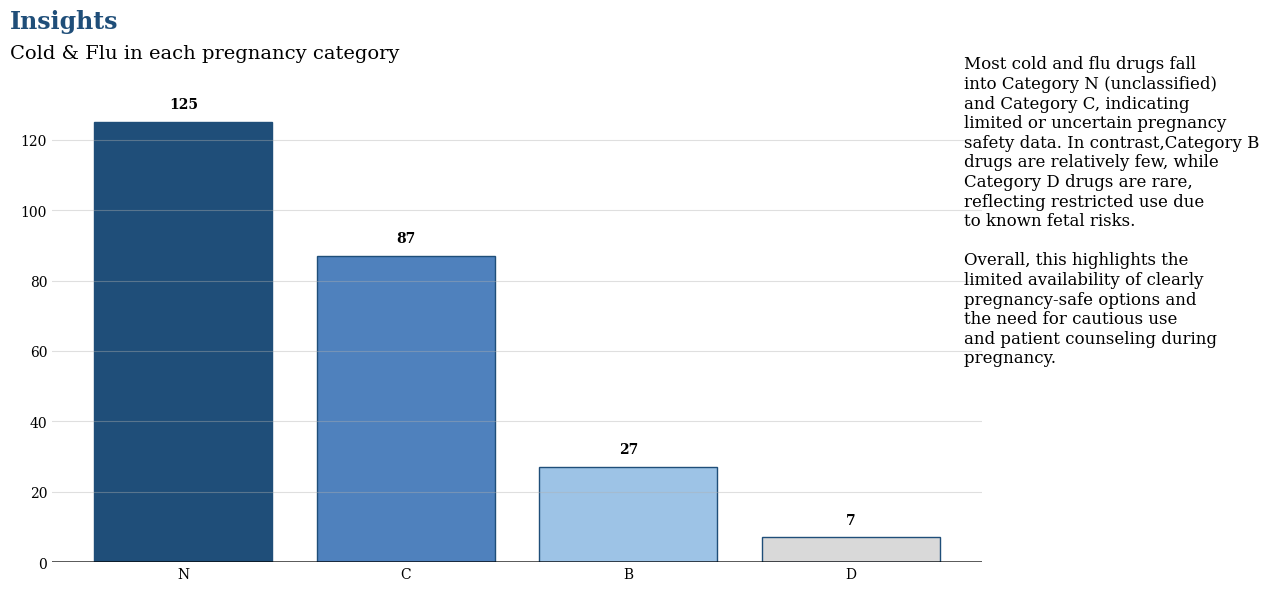

In [61]:
fig, ax = plt.subplots(1,1, figsize=(12,6))

color_map =['#1f4e79', '#4f81bd', '#9dc3e6', '#d9d9d9']

ax.bar(cold_preg_drugs.index, cold_preg_drugs['count'], color=color_map, edgecolor='#1f4e79')

spines = ['top','bottom', 'left', 'right']
for s in spines:
    ax.spines[s].set_visible(False)

ax.tick_params(length=0, which=u"both", axis=u"both")

for label in ax.get_yticklabels():
    label.set_fontname('serif')

for label in ax.get_xticklabels():
    label.set_fontname('serif')

for x, val in enumerate(cold_preg_drugs['count']):
    ax.annotate(
        f"{val}",
        xy=(x, val + 5),
        ha='center',
        va='center',
        fontweight='bold',
        fontfamily='serif'
    )

fig.text(0.85, 0.41, '''
        Most cold and flu drugs fall 
        into Category N (unclassified) 
        and Category C, indicating 
        limited or uncertain pregnancy 
        safety data. In contrast,Category B 
        drugs are relatively few, while 
        Category D drugs are rare, 
        reflecting restricted use due 
        to known fetal risks. 
         
        Overall, this highlights the 
        limited availability of clearly 
        pregnancy-safe options and 
        the need for cautious use 
        and patient counseling during 
        pregnancy.
        '''
        , fontsize=12, fontweight='light', fontfamily='serif'
    )

fig.text(0.09,1,"Insights",color='#1f4e79', fontfamily='serif', fontweight='bold', fontsize=17)
fig.text(0.09,0.95,"Cold & Flu in each pregnancy category", fontfamily='serif', fontweight='light', fontsize=14)

ax.axhline(y=0, color='black', linewidth=1.3, alpha=0.7)

ax.grid(alpha=0.4, axis='y')

Next, we will explore other medical conditions to uncover patterns and insights across different drug categories.

In [62]:
other_df = df[~df['medical_condition'].isin(['Colds & Flu', 'Pain'])]

Next, we will explore pregnancy categories across other medical conditions to identify patterns and insights.

In [63]:
other_preg = (
    other_df
    .groupby(['medical_condition', 'pregnancy_category'])
    .size()
    .unstack(fill_value=0)
)

other_preg = other_preg.loc[
    other_preg.sum(axis=1).sort_values(ascending=False).head(10).index
]

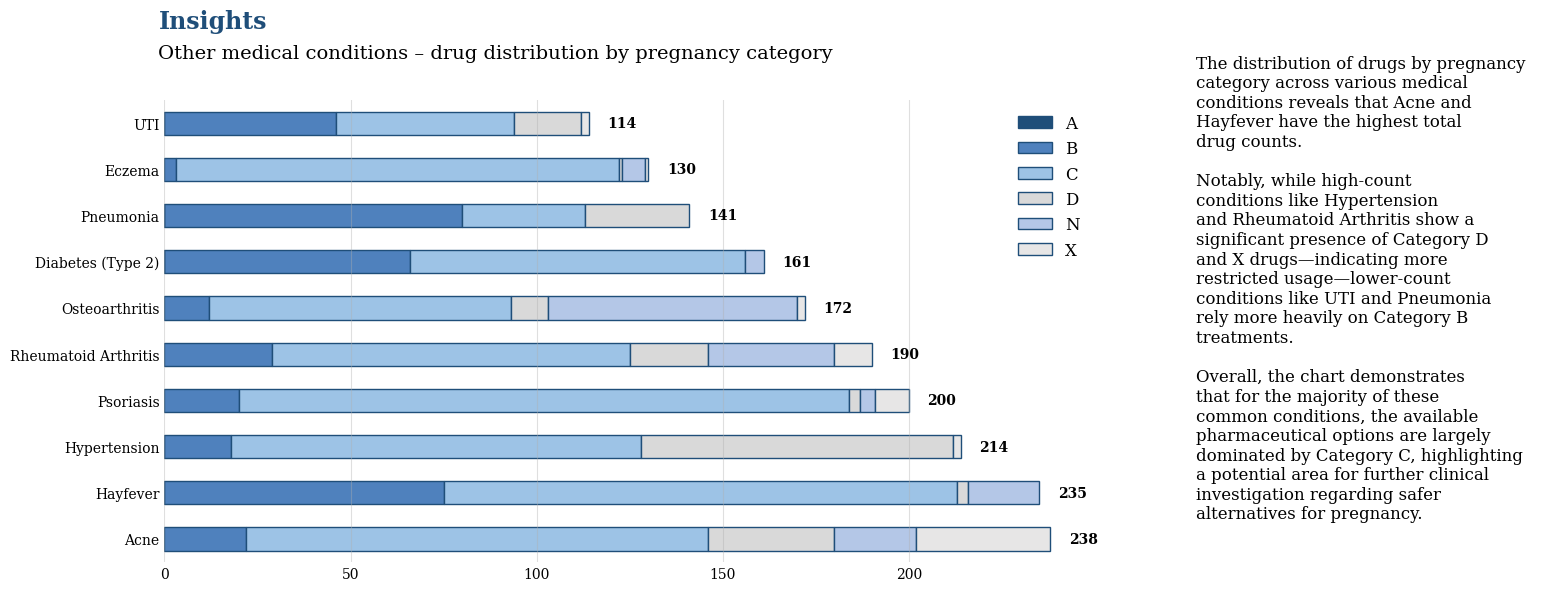

In [64]:
fig, ax = plt.subplots(1, 1, figsize=(12,6))

color_map = ['#1f4e79', '#4f81bd', '#9dc3e6', '#d9d9d9', '#b4c7e7', '#e7e6e6']

other_preg.plot(
    kind='barh',
    stacked=True,
    ax=ax,
    color=color_map,
    edgecolor='#1f4e79'
)

for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

ax.tick_params(length=0, which='both')
ax.grid(axis='x', alpha=0.4)

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontname('serif')

ax.set_xlabel('', fontfamily='serif')
ax.set_ylabel('', fontfamily='serif')

for y_pos, row in enumerate(other_preg.values):
    total = row.sum()
    ax.annotate(
        f"{total}",
        xy=(total + 5, y_pos),
        va='center',       
        ha='left',             
        fontfamily='serif',
        fontsize=10,
        fontweight='bold'
    )

fig.text(0.95, 0.15, '''
        The distribution of drugs by pregnancy 
        category across various medical 
        conditions reveals that Acne and 
        Hayfever have the highest total 
        drug counts.
        
        Notably, while high-count 
        conditions like Hypertension 
        and Rheumatoid Arthritis show a 
        significant presence of Category D 
        and X drugs—indicating more 
        restricted usage—lower-count 
        conditions like UTI and Pneumonia 
        rely more heavily on Category B 
        treatments. 
         
        Overall, the chart demonstrates 
        that for the majority of these 
        common conditions, the available 
        pharmaceutical options are largely 
        dominated by Category C, highlighting 
        a potential area for further clinical 
        investigation regarding safer 
        alternatives for pregnancy.
        '''
        , fontsize=12, fontweight='light', fontfamily='serif'
    )

fig.text(0.12, 1, "Insights",
         color='#1f4e79', fontfamily='serif',
         fontweight='bold', fontsize=17)

fig.text(0.12, 0.95,
         "Other medical conditions – drug distribution by pregnancy category",
         fontfamily='serif', fontweight='light', fontsize=14)

ax.legend(
    title='',
    frameon=False,
    prop={'family': 'serif', 'size': 12},
)

Next, we will explore the distribution of OTC and Rx drugs across other medical conditions to identify patterns and insights.

In [65]:
other_otc_rx = (
    other_df
    .groupby(['medical_condition', 'rx_otc'])
    .size()
    .unstack(fill_value=0)
)

other_otc_rx = other_otc_rx.loc[
    other_otc_rx.sum(axis=1).sort_values(ascending=False).head(10).index
]

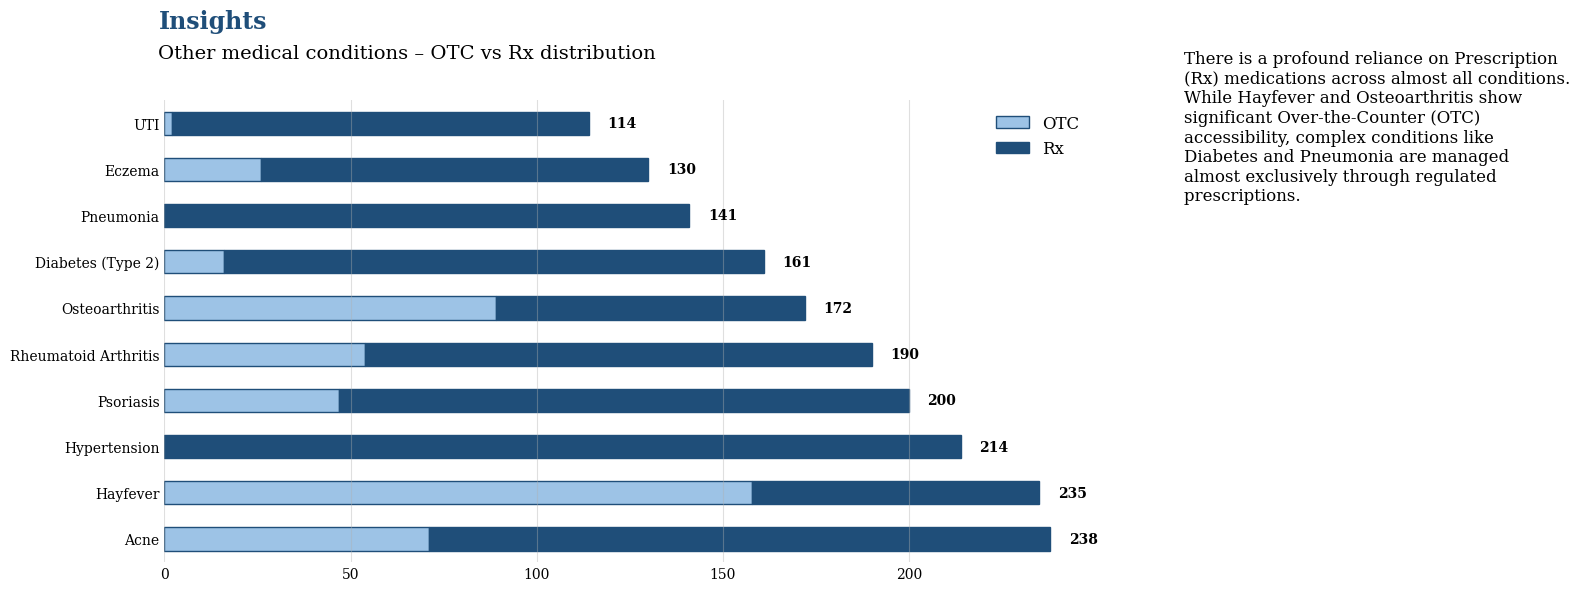

In [66]:
fig, ax = plt.subplots(1, 1, figsize=(12,6))

# Palette aligned with your style
color_otc = '#9dc3e6'
color_rx  = '#1f4e79'

other_otc_rx[['OTC','Rx']].plot(
    kind='barh',
    stacked=True,
    ax=ax,
    color=[color_otc, color_rx],
    edgecolor='#1f4e79'
)

for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

ax.tick_params(length=0, which='both')
ax.grid(axis='x', alpha=0.4)

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontname('serif')

ax.set_xlabel('', fontfamily='serif')
ax.set_ylabel('', fontfamily='serif')

for y_pos, row in enumerate(other_otc_rx.values):
    total = row.sum()
    ax.annotate(
        f"{total}",
        xy=(total + 5, y_pos),
        va='center',       
        ha='left',             
        fontfamily='serif',
        fontsize=10,
        fontweight='bold'
    )

fig.text(0.94, 0.68, '''
        There is a profound reliance on Prescription 
        (Rx) medications across almost all conditions. 
        While Hayfever and Osteoarthritis show
        significant Over-the-Counter (OTC) 
        accessibility, complex conditions like 
        Diabetes and Pneumonia are managed 
        almost exclusively through regulated 
        prescriptions.
        '''
        , fontsize=12, fontweight='light', fontfamily='serif'
    )

fig.text(0.12, 1, "Insights",
         color='#1f4e79', fontfamily='serif',
         fontweight='bold', fontsize=17)

fig.text(0.12, 0.95,
         "Other medical conditions – OTC vs Rx distribution",
         fontfamily='serif', fontweight='light', fontsize=14)

ax.legend(
    title='',
    frameon=False,
    prop={'family': 'serif', 'size': 12},
)


## Thanks

I hope you enjoyed this notebook
please consider voting up, Good luck